# Image Reconstruction
## deblurring denoising


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataLoader, Blurr, Add_noise
from Codes.imestimator import Estimator_TV
from Codes.posttreat import Display
from Codes.posttreat import Error_Display

In [2]:
import os
from PIL import Image
from scipy import signal
from scipy import interpolate

#### Image 

In [3]:
file_name = 'Images'
im_name   = 'image01.png'
x_i = DataLoader(file_name,im_name)
# Taille de l'image
print("Taille de l'image :")
print(x_i.shape)
# Rescaling
x_i = x_i/np.amax(x_i)

Taille de l'image :
(600, 800)


#### Kernel

2D Gaussian-like array:


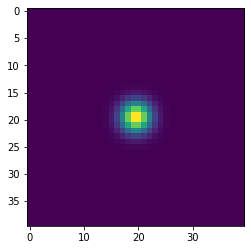

In [4]:
M         = 20
Nx, Ny    = np.meshgrid(np.linspace(-1,1,2*M), np.linspace(-1,1,2*M))
d         = np.sqrt(Nx*Nx+Ny*Ny)
sigma, mu = 0.1, 0.0
K         = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
K         = K/K.sum()
print("2D Gaussian-like array:")
plt.imshow(K)

#### Image reconstruction

(600, 800)


(-0.5, 799.5, 599.5, -0.5)

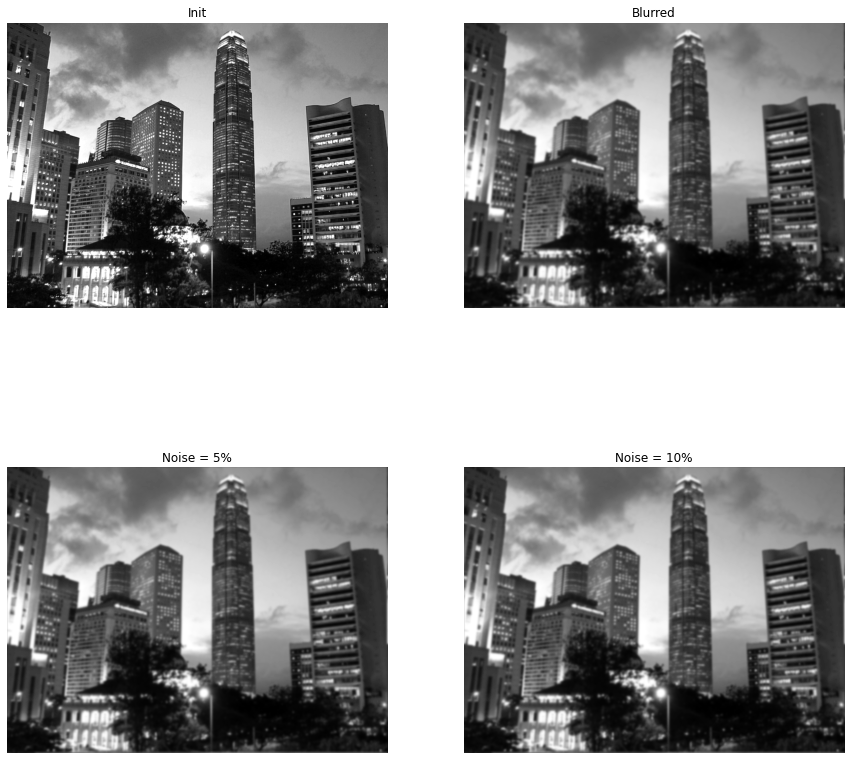

In [5]:
x_b = Blurr(x_i,K)
x_o1 = Add_noise(x_b)
x_o2 = Add_noise(x_b, noise_level = 0.1)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2 , figsize=(15,15))
ax1.imshow(x_i, cmap='gray')
ax1.set_title('Init')
ax1.axis('off')
ax2.imshow(x_b, cmap='gray')
ax2.set_title('Blurred')
ax2.axis('off')
ax3.imshow(x_o1, cmap='gray')
ax3.set_title('Noise = 5%')
ax3.axis('off')
ax4.imshow(x_o2, cmap='gray')
ax4.set_title('Noise = 10%')
ax4.axis('off')

##### No noise

In [6]:
mu    = 1
x_r,En = Estimator_TV(x_b,K,mu,niter = 5000)

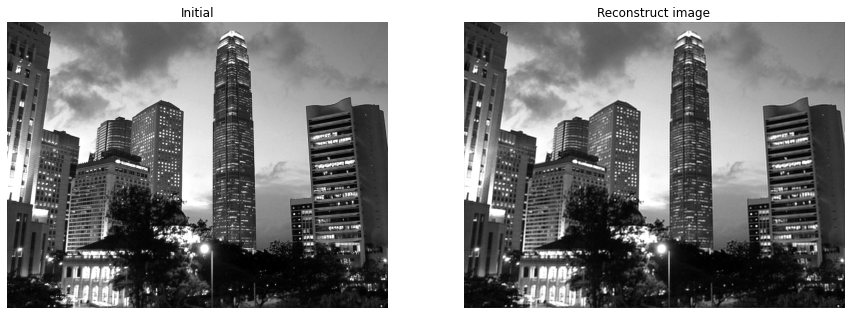

Erreur totale :
0.09831843404904751


In [7]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))
# initial image
ax0.imshow(x_i,cmap='gray')
ax0.set_title('Initial')
ax0.axis('off')
# Reconstruct image
ax1.imshow(x_r,cmap='gray')
ax1.set_title('Reconstruct image')
ax1.axis('off')
# Show plot
plt.show()
# Error computation and dispay
norm     = np.linalg.norm(x_i)
error_l2 = np.linalg.norm(x_r-x_i)/norm
print("Erreur totale :")
print(error_l2)

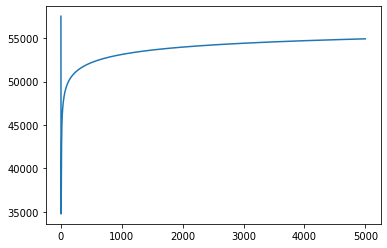

In [8]:
plt.plot(En)

##### Noise 5%

In [9]:
mu    = 100
x_r,_ = Estimator_TV(x_o1,K,mu,niter = 5000)

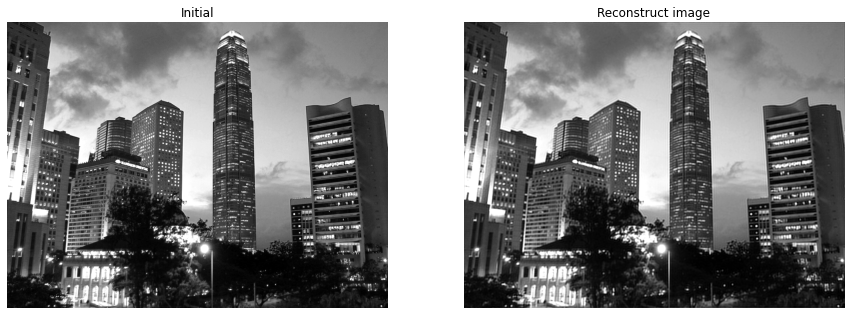

Erreur totale :
0.09831838634119512


In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))
# initial image
ax0.imshow(x_i,cmap='gray')
ax0.set_title('Initial')
ax0.axis('off')
# Reconstruct image
ax1.imshow(x_r,cmap='gray')
ax1.set_title('Reconstruct image')
ax1.axis('off')
# Show plot
plt.show()
# Error computation and dispay
norm     = np.linalg.norm(x_i)
error_l2 = np.linalg.norm(x_r-x_i)/norm
print("Erreur totale :")
print(error_l2)

##### Noise 10%

In [11]:
mu    = 100
x_r,_ = Estimator_TV(x_o2,K,mu,niter = 5000)

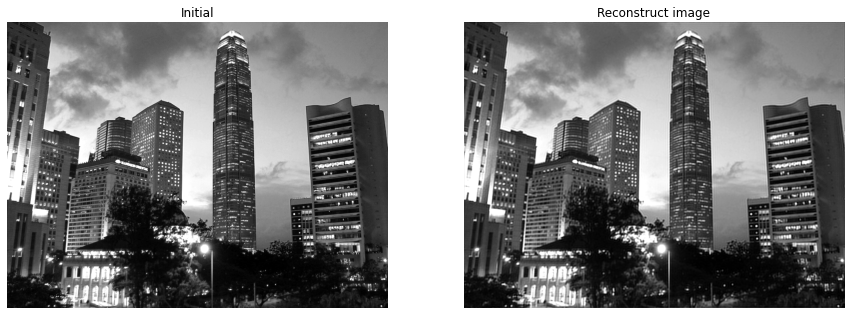

Erreur totale :
0.09832120923986187


In [12]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,7))
# initial image
ax0.imshow(x_i,cmap='gray')
ax0.set_title('Initial')
ax0.axis('off')
# Reconstruct image
ax1.imshow(x_r,cmap='gray')
ax1.set_title('Reconstruct image')
ax1.axis('off')
# Show plot
plt.show()
# Error computation and dispay
norm     = np.linalg.norm(x_i)
error_l2 = np.linalg.norm(x_r-x_i)/norm
print("Erreur totale :",error_l2)